In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
plt.style.use("seaborn-whitegrid")       
import pandas_profiling as pp 

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-data-simple-linear-regression/Salary_Data.csv


In [2]:
df = pd.read_csv("/kaggle/input/salary-data-simple-linear-regression/Salary_Data.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.shape

(30, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


#  2. Data Visualization

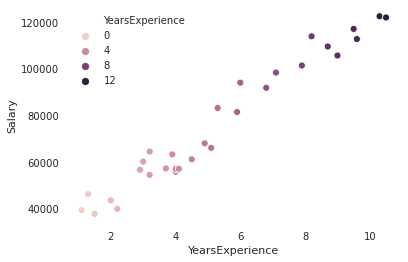

In [7]:

sns.scatterplot(x = "YearsExperience", y = "Salary",hue = "YearsExperience",data = df);


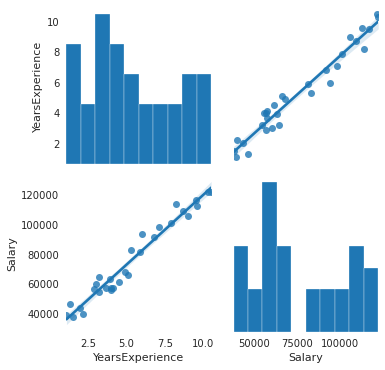

In [8]:
sns.pairplot(df,kind= "reg");

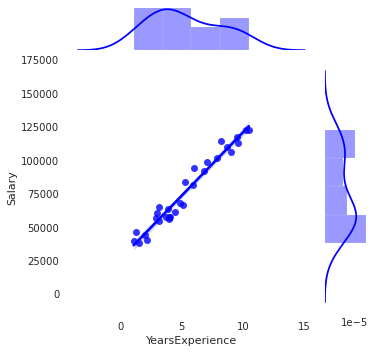

In [9]:
sns.jointplot(x="YearsExperience", y="Salary",color = 'blue',kind = "reg", data=df,size = 5);

# 3.Model

In [10]:
X = df['YearsExperience']
y = df['Salary']

## 3.1.Stats Model

In [11]:
import statsmodels.api as sm
X = sm.add_constant(X)
lm = sm.OLS(y, X)
model = lm.fit()
model.summary()

#You can use stats model to learn statistical details (such as p_value, model parameters ..)
#You can create a model with using stats model in order to predict values. 
#the stats model is mostly used to look at statistical details, to understand the data and model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           1.14e-20
Time:                        20:47:23   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)

f_pvalue:  0.0000


In [13]:
model.params

const              25792.200199
YearsExperience     9449.962321
dtype: float64

In [14]:
STM = "Salary = " +  str("%.4f" % model.params[0]) + " + " + "YearsExperience*" + str("%.4f" % model.params[1])
print(STM)

Salary = 25792.2002 + YearsExperience*9449.9623


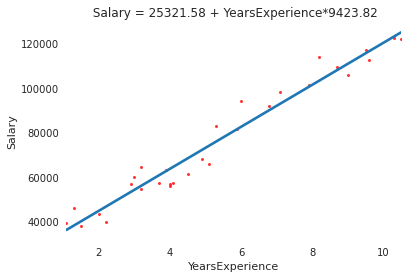

In [15]:
g = sns.regplot(df["YearsExperience"], df["Salary"], ci=None, scatter_kws={'color':'r', 's':9});
g.set_title(" Salary = 25321.58 + YearsExperience*9423.82");
g.set_ylabel("Salary");
g.set_xlabel("YearsExperience");
#plt.xlim(-10,310)
#plt.ylim(bottom=0)

## 3.2. LinearRegression

In [16]:
X = df['YearsExperience']
y = df['Salary']

In [17]:

from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

In [18]:
X_train.shape

(24,)

In [19]:
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

#numpy.newaxis is used to increase the dimension of the existing array by one more dimension, when used once.

In [20]:
X_train.shape

#After used numpy.newaxis, shape of X_train was change. In order to use fit(), your feature shape must be column vector.

(24, 1)

In [21]:
X_test.shape

(6, 1)

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train,y_train)

In [23]:
model.intercept_

25321.583011776813

In [24]:
model.coef_ 

array([9423.81532303])

In [25]:
LR = "Salary = " +  str("%.2f" % model.intercept_ ) + " + YearsExperience" + "*" + str("%.2f" % model.coef_)
print(LR)

Salary = 25321.58 + YearsExperience*9423.82


In [26]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

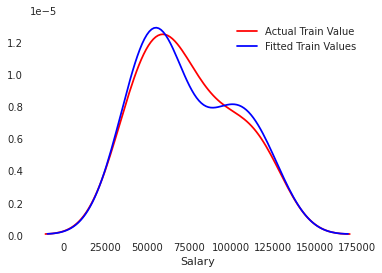

In [27]:
ax1 = sns.distplot(model.predict(X_train), hist=False, color="r", label="Actual Train Value")
sns.distplot(y_train, hist=False, color="b", label="Fitted Train Values" , ax=ax1);

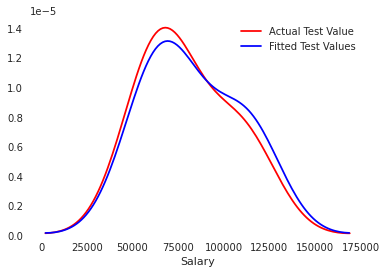

In [28]:
ax1 = sns.distplot(model.predict(X_test), hist=False, color="r", label="Actual Test Value")
sns.distplot(y_test, hist=False, color="b", label="Fitted Test Values" , ax=ax1);

In [29]:
trainscr = model.score(X_train, y_train)
testscr = model.score(X_test, y_test)

print("train score:{}\ntest score:{}".format(trainscr,testscr))

train score:0.9645401573418146
test score:0.9024461774180497


In [30]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))


rmse1 = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))


print("train rmse:{}\ntest rmse:{}".format(rmse,rmse1))

train rmse:5205.982110155719
test rmse:7059.04362190151


In [31]:
print(STM)
print(LR)

Salary = 25792.2002 + YearsExperience*9449.9623
Salary = 25321.58 + YearsExperience*9423.82
